### Try out sentence embeddings on sample sentences

mostly from:

https://www.kaggle.com/code/colinmorris/visualizing-embeddings-with-t-sne

pretrained model from:

https://www.analyticsvidhya.com/blog/2020/08/top-4-sentence-embedding-techniques-using-python/

In [1]:
from sentence_transformers import SentenceTransformer

In [2]:
sbert_model = SentenceTransformer('bert-base-nli-mean-tokens')

In [3]:
import pandas as pd

In [6]:
from scipy.spatial.distance import cosine as cosine

In [68]:
df_path = 'dataframes/with_counts/combined_count.csv'

In [69]:
df = pd.read_csv(df_path, index_col = 0)

In [41]:
df['Artist'].unique()

array(['Aaliyah', 'Beyoncé', 'Britney Spears', 'Carly Rae Jepsen',
       'Charli XCX', 'Dua Lipa', 'Madonna', 'Michael Jackson',
       'Olivia Rodrigo', 'Taylor Swift', '2Pac', 'A Tribe Called Quest',
       'Eminem', 'Ice Cube', 'JAY-Z', 'Kanye West', 'Kendrick Lamar',
       'MF DOOM', 'Nas', 'Yasiin Bey', 'Black Sabbath', 'Deep Purple',
       'Foo Fighters', 'Fugazi', 'Led Zeppelin', 'Nirvana',
       'Queens of the Stone Age', 'The Rolling Stones', 'The Strokes',
       'The White Stripes', 'Al Green', 'Aretha Franklin',
       'Clarence Carter', 'Curtis Mayfield', 'Marvin Gaye',
       'Minnie Riperton', 'Nina Simone', 'Otis Redding', 'Sam Cooke',
       'Stevie Wonder'], dtype=object)

In [44]:
test_df = df[(df['Artist'] == 'Aaliyah') | (df['Artist'] == 'Nirvana')]

In [45]:
sample_sentences = list(test_df['Song Lyrics'].str.lower())

In [46]:
sample_sentence_embeddings = sbert_model.encode(sample_sentences)

In [47]:
sample_sentence_embeddings.shape

(40, 768)

In [16]:
from sklearn.manifold import TSNE

In [48]:
tsne = TSNE(random_state=1, n_iter=1000, metric="cosine", perplexity = 10)

In [49]:
tsne_embd = tsne.fit_transform(sample_sentence_embeddings)

In [50]:
tsne_df = pd.DataFrame(columns=['x', 'y'])

In [51]:
tsne_df['x'] = tsne_embd[:, 0]
tsne_df['y'] = tsne_embd[:, 1]

In [52]:
tsne_embd[:5]

array([[-5.7948604,  2.7605186],
       [ 4.7458453,  3.3323689],
       [ 5.0397363,  2.9182332],
       [ 1.5973285, -1.6567488],
       [ 5.283419 , -1.3855382]], dtype=float32)

In [28]:
import matplotlib.pyplot as plt

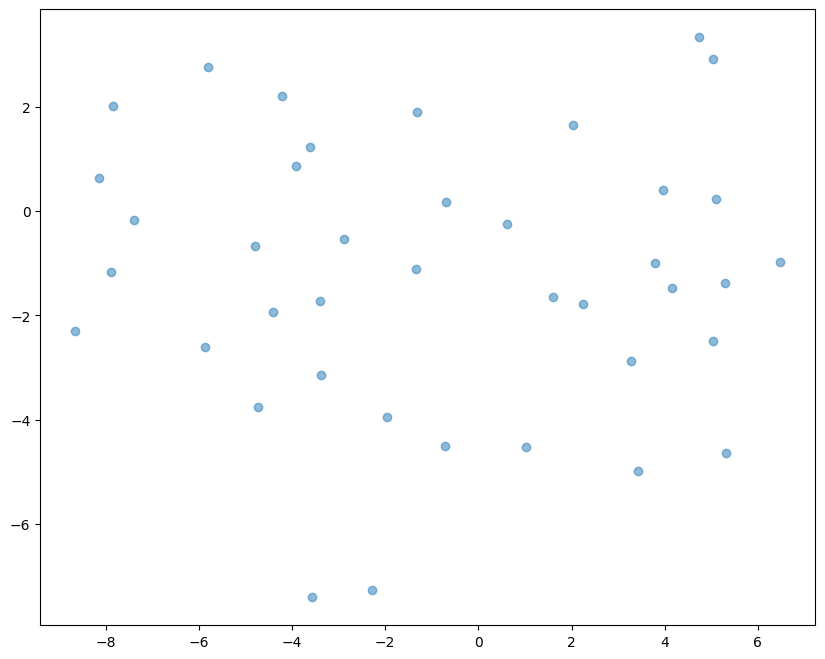

In [53]:
FS = (10, 8)
fig, ax = plt.subplots(figsize=FS)
# Make points translucent so we can visually identify regions with a high density of overlapping points
ax.scatter(tsne_df.x, tsne_df.y, alpha=.5);

dodawanie slow/tytulwo - dla kazdego slowa (tam) generowane / dobierane

tutaj mozemy osobno generowac dla kazdego artysty / odbierac z wszystkich i kolorowac zaleznie od niego albo cos

https://www.himandthyme.com/understanding-and-visualizing-word-embeddings-with-glove-and-word2vec/

kod:
```
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize_embeddings(embeddings, words):
    tsne = TSNE(n_components=2, random_state=0, perplexity=len(words)-1)
    embedding_vectors = np.array([embeddings[word] for word in words])
    two_d_embeddings = tsne.fit_transform(embedding_vectors)

    plt.figure(figsize=(8, 8))
    for i, word in enumerate(words):
        x, y = two_d_embeddings[i, :]
        plt.scatter(x, y)
        plt.annotate(word, (x, y), xytext=(5, 2), textcoords="offset points", ha="right", va="bottom")
    plt.show()

# For GloVe
glove_words = [word for word in preprocessed_tokens if word in glove_embeddings]
visualize_embeddings(glove_embeddings, glove_words)

# For Word2Vec
word2vec_words = model.wv.index_to_key
visualize_embeddings(mode
```l.wv, word2vec_words)

In [55]:
tsne_embd.shape

(40, 2)

### Try to generate embeddings for whole artist corpuses

In [74]:
artists = list(df['Artist'].unique())

In [75]:
artists

['Aaliyah',
 'Beyoncé',
 'Britney Spears',
 'Carly Rae Jepsen',
 'Charli XCX',
 'Dua Lipa',
 'Madonna',
 'Michael Jackson',
 'Olivia Rodrigo',
 'Taylor Swift',
 '2Pac',
 'A Tribe Called Quest',
 'Eminem',
 'Ice Cube',
 'JAY-Z',
 'Kanye West',
 'Kendrick Lamar',
 'MF DOOM',
 'Nas',
 'Yasiin Bey',
 'Black Sabbath',
 'Deep Purple',
 'Foo Fighters',
 'Fugazi',
 'Led Zeppelin',
 'Nirvana',
 'Queens of the Stone Age',
 'The Rolling Stones',
 'The Strokes',
 'The White Stripes',
 'Al Green',
 'Aretha Franklin',
 'Clarence Carter',
 'Curtis Mayfield',
 'Marvin Gaye',
 'Minnie Riperton',
 'Nina Simone',
 'Otis Redding',
 'Sam Cooke',
 'Stevie Wonder']

#### Save Artists with their summed lyrics to a separate df file for ease of use

In [76]:
all_lyrics_df = pd.DataFrame(columns = ['Artist', 'all_lyrics', 'genre', 'gender'])

for artist in artists:
    artist_df = df[df['Artist'] == artist]
    artist_lyrics = ' '.join(artist_df['Song Lyrics'].str.lower())
    artist_df = artist_df.reset_index()
    # print(artist_df.index)
    genre = artist_df['genre'][0]
    gender = artist_df['gender'][0]

    new_row = {
        'Artist': artist,
        'all_lyrics': artist_lyrics,
        'genre': genre,
        'gender': gender
    }

    new_row_df = pd.DataFrame([new_row])
    all_lyrics_df = pd.concat([all_lyrics_df, new_row_df])
    

In [80]:
all_lyrics_df.to_csv('dataframes/lyrics_combined.csv')

### ========== fixing the dataframe with counts by adding extra metadata about artists from cleaned_combined =========

In [62]:
clean_path = 'dataframes/genres/cleaned_combined.csv'

In [63]:
clean_df = pd.read_csv(clean_path, index_col=0)

In [64]:
counts_path = 'dataframes/with_counts/combined_count.csv'

In [65]:
counts_df = pd.read_csv(counts_path, index_col=0)

In [66]:
counts_df['genre'] = clean_df['genre']
counts_df['gender'] = clean_df['gender']

In [67]:
counts_df.to_csv(counts_path)